<h1> <b> Fake News  Prediction </b> </h1>

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet


In [ ]:
import pandas as pd
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving news.csv to news (1).csv


In [ ]:

df=pd.read_csv('news.csv')
df.head(2)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE


In [ ]:
for i in range(df.shape[0]):
  if df['label'][i]=='FAKE':
    df['label'][i]=0
  else:
    df['label'][i]=1

In [ ]:
df.head(2)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0


Number of News that are Fake News  3171 , ( 50.05524861878453 %)
Number of News that are Real 3164 , ( 49.94475138121547 %)


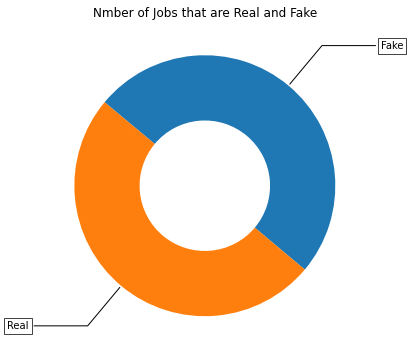

In [ ]:
# PROVIDE CITATIONS TO YOUR CODE IF YOU TAKE IT FROM ANOTHER WEBSITE.
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
y_value_counts = df['label'].value_counts()

print("Number of News that are Fake News ", y_value_counts[1], ", (", float(y_value_counts[1]/float(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of News that are Real", y_value_counts[0], ", (", float(y_value_counts[0]/float(y_value_counts[1]+y_value_counts[0]))*100,"%)")


fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Fake", "Real"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Nmber of Jobs that are Real and Fake")

plt.show()

<h2> <b>Observation :</b></h2>
There is 49.95% jobs are Real and around 50.05% are fake jobs. <br>
Dataset is Balanced 

###Missing values in dataset

In [ ]:
#Missing values in dataset


for col in df.columns:
    nullrow=df[col].isnull().sum()
    notrow=df[col].notnull().sum()
    percentage=(nullrow*100)/(nullrow+notrow)
    if percentage > 30 :
        print("Column is ",col,percentage,"% Missing Values")
    
    

**Observation<br>**
There is no missing value in the dataset.

## Data Preprocessing

In [ ]:
print(df['title'].values[50])
print('*'*100)
print(df['title'].values[100])
print('*'*100)
print(df['title'].values[150])
print('*'*100)
print(df['title'].values[250])
print('*'*100)
print(df['title'].values[5000])
print('*'*100)


American politics has reached peak polarization
****************************************************************************************************
How Ted Cruz Became Ted Cruz
****************************************************************************************************
Shutdown clash to return in force by December
****************************************************************************************************
Trump mulls alternative options for making Mexico finance 'the wall'
****************************************************************************************************
Levers of Power: Flushing the Vote Down the Memory Hole
****************************************************************************************************


In [ ]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [ ]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_title = []
# tqdm is for printing the status bar
for title in tqdm(df['title'].values):
    t = decontracted(title)
    t = t.replace('\\r', ' ')
   
    t = t.replace('\\"', ' ')
    t = t.replace('-','_')
    t = t.replace('\\n', ' ')
    t = re.sub('[^A-Za-z0-9]+', ' ',t)
    # https://gist.github.com/sebleier/554280
    t = ' '.join(e for e in t.split() if e not in stopwords)
    preprocessed_title.append(t.lower().strip())

100%|██████████| 6335/6335 [00:00<00:00, 25773.88it/s]


In [ ]:
df.drop(['title'],axis=1,inplace=True)
df['preprocessed_title']=preprocessed_title


In [ ]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_text = []
# tqdm is for printing the status bar
for text in tqdm(df['text'].values):
    t = decontracted(text)
    t = t.replace('\\r', ' ')
   
    t = t.replace('\\"', ' ')
    t = t.replace('-','_')
    t = t.replace('\\n', ' ')
    t = re.sub('[^A-Za-z0-9]+', ' ',t)
    # https://gist.github.com/sebleier/554280
    t = ' '.join(e for e in t.split() if e not in stopwords)
    preprocessed_text.append(t.lower().strip())
    
df.drop(['text'],axis=1,inplace=True)
df['preprocessed_text']=preprocessed_text


100%|██████████| 6335/6335 [00:10<00:00, 622.12it/s]


In [ ]:
y=df['label']
X_train, X_test, y_train, y_test = train_test_split(df,y,test_size=0.3,random_state=1)


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(4434, 4) (4434,)
(1901, 4) (1901,)


### Text to Numerical Vectors TFIDF

In [ ]:
X_train.head(2)

,Unnamed: 0,label,preprocessed_title,preprocessed_text
4297,7266,0,this is what it means if you have two dimples ...,posted eddie whether back dimples not admit qu...
3757,3822,1,white house republicans work together final pu...,house republicans president obama joined force...


In [ ]:
# Convert text into numerical with the help of TFIDF Vectorizer
# Preprocessed Title

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
#print(vectorizer.get_feature_names())

train_title_tfidf = vectorizer.fit_transform(X_train['preprocessed_title'])
test_title_tfidf = vectorizer . transform(X_test['preprocessed_title'])
print("Shape of matrix after one hot encodig ",train_title_tfidf.shape)
print("Shape of matrix after one hot encodig ",test_title_tfidf.shape)


Shape of matrix after one hot encodig  (4434, 739)
Shape of matrix after one hot encodig  (1901, 739)


In [ ]:
# Preprocessed text
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
#print(vectorizer.get_feature_names())

train_text_tfidf = vectorizer.fit_transform(X_train['preprocessed_text'])
test_text_tfidf = vectorizer . transform(X_test['preprocessed_text'])
print("Shape of matrix after one hot encodig ",train_text_tfidf.shape)
print("Shape of matrix after one hot encodig ",test_text_tfidf.shape)


Shape of matrix after one hot encodig  (4434, 13602)
Shape of matrix after one hot encodig  (1901, 13602)


In [ ]:
# Combine   text_numberical vectors.
from scipy.sparse import hstack
y_train=y_train.astype('int')
y_test=y_test.astype('int')

X_tr=hstack((train_title_tfidf,train_text_tfidf)).tocsr()
X_te=hstack((test_title_tfidf,test_text_tfidf)).tocsr()

print("Final Data Matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)


Final Data Matrix
(4434, 14341) (4434,)
(1901, 14341) (1901,)


In [ ]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

<h2> <b> Multinomial Naive Bayes Model </b> </h2>

In [ ]:
#training the model
from sklearn.naive_bayes import MultinomialNB

mnb=MultinomialNB()
#fitting the nb for bag of words
mnb=mnb.fit(X_tr,y_train)
print(mnb)
#fitting the nb for tfidf features
#mnb_tfidf=mnb.fit(tv_train_reviews,train_category)
#print(mnb_tfidf)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [ ]:
#Predicting the model for bag of words
mnb_predict=mnb.predict(X_te)


In [ ]:
#Accuracy score for bag of words
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

mnb_score=accuracy_score(y_test,mnb_predict)
print("mnb_bow_score :",mnb_score)


mnb_bow_score : 0.902682798527091


<h2> <b> Observation </b> </h2>
<ul>
<li> We use Accuracy as performance measure to determine the performance of model </li>
<li> With the use of Machine Learning Model(MNB Model) we got Accuracy of 97.58% </li>
</ul>

## Precision and Recall Matrix

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
mnb_report=classification_report(y_test,mnb_predict,target_names=['0','1'])
print(mnb_report)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       987
           1       0.88      0.92      0.90       914

    accuracy                           0.90      1901
   macro avg       0.90      0.90      0.90      1901
weighted avg       0.90      0.90      0.90      1901



**Confusion Matrix**

In [ ]:
cm_cv = confusion_matrix(y_test,mnb_predict)


In [ ]:
cm_cv = confusion_matrix(y_test,mnb_predict)

cm_cv = pd.DataFrame(cm_cv, index=[0,1], columns=[0,1])
cm_cv.index.name = 'Actual'
cm_cv.columns.name = 'Predicted'


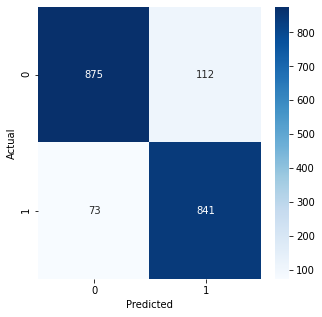

In [ ]:
import seaborn as sns
plt.figure(figsize = (5,5))
sns.heatmap(cm_cv,cmap= "Blues",annot = True, fmt='')


In [ ]:
df.head(2)

,Unnamed: 0,label,preprocessed_title,preprocessed_text
0,8476,0,you can smell hillary fear,daniel greenfield shillman journalism fellow f...
1,10294,0,watch the exact moment paul ryan committed pol...,google pinterest digg linkedin reddit stumbleu...


### Word Cloud of Real job

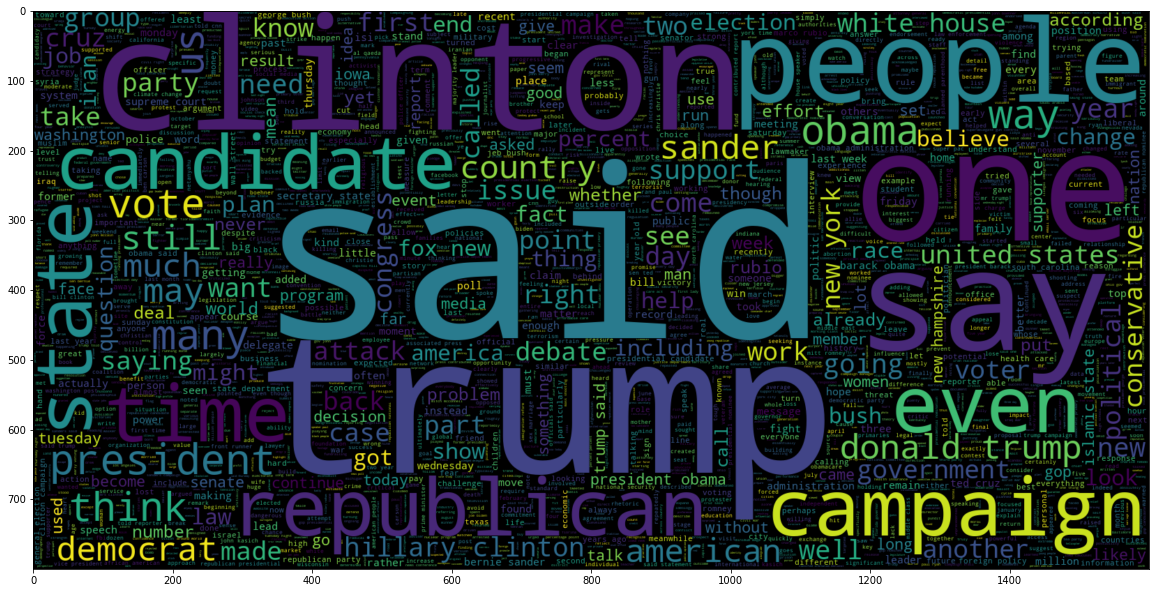

In [ ]:
plt.figure(figsize = (20,20)) # Text that is not fraudulent(0)
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df[df.label == 1].preprocessed_text))
plt.imshow(wc , interpolation = 'bilinear')


### Word Cloud of Fake job

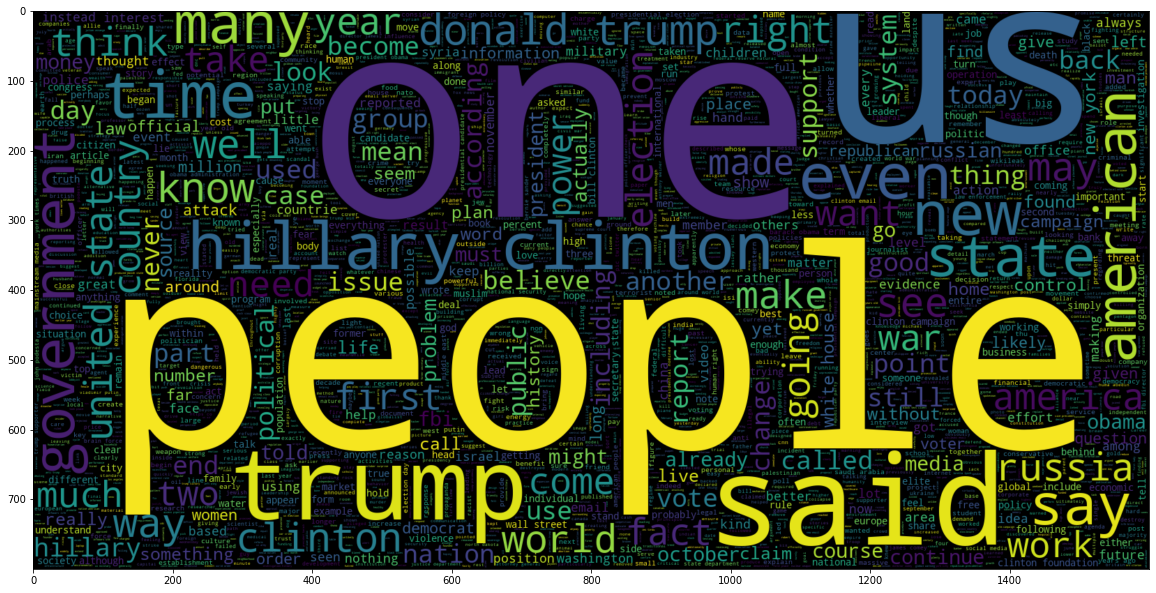

In [ ]:
plt.figure(figsize = (20,20)) # Text that is  fraudulent(0)
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df[df.label == 0].preprocessed_text))
plt.imshow(wc , interpolation = 'bilinear')


### Deep Learning Model

In [ ]:
#

#from keras.models import Sequential

from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential



model = Sequential()
model.add(Dense(units = 100 , activation = 'relu' , input_dim = X_tr.shape[1]))
model.add(Dense(units = 50 , activation = 'relu'))
model.add(Dense(units = 25 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'relu'))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               1434200   
_________________________________________________________________
dense_11 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_12 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 1,440,796
Trainable params: 1,440,796
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Combine all categorical, numerical and text_number vectors.
from scipy.sparse import hstack
y_train=y_train.astype('int')
y_test=y_test.astype('int')

X_tr=hstack((train_title_tfidf,train_text_tfidf)).tocsr()
X_te=hstack((test_title_tfidf,test_text_tfidf)).tocsr()

print("Final Data Matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)


Final Data Matrix
(4434, 14341) (4434,)
(1901, 14341) (1901,)


In [ ]:
type(X_tr.todense())

numpy.matrix

In [ ]:
model.fit(X_tr.todense(),y_train , epochs = 20)


Epoch 1/20
139/139 [==============================] - 1s 5ms/step - loss: 0.3445 - accuracy: 0.8793
Epoch 2/20
139/139 [==============================] - 1s 5ms/step - loss: 0.0413 - accuracy: 0.9876
Epoch 3/20
139/139 [==============================] - 1s 5ms/step - loss: 0.0061 - accuracy: 0.9986
Epoch 4/20
139/139 [==============================] - 1s 5ms/step - loss: 0.0014 - accuracy: 0.9998
Epoch 5/20
139/139 [==============================] - 1s 5ms/step - loss: 4.5152e-04 - accuracy: 1.0000
Epoch 6/20
139/139 [==============================] - 1s 5ms/step - loss: 1.7365e-04 - accuracy: 1.0000
Epoch 7/20
139/139 [==============================] - 1s 5ms/step - loss: 8.5444e-05 - accuracy: 1.0000
Epoch 8/20
139/139 [==============================] - 1s 5ms/step - loss: 4.9035e-05 - accuracy: 1.0000
Epoch 9/20
139/139 [==============================] - 1s 5ms/step - loss: 2.9771e-05 - accuracy: 1.0000
Epoch 10/20
139/139 [==============================] - 1s 5ms/step - loss: 1.970

In [ ]:

pred_cv = model.predict(X_te.todense())

pred_cv = np.around(pred_cv , decimals = 0)


In [ ]:
accuracy_score(pred_cv,y_test)


0.9347711730668069

<h2> <b> Observation </b> </h2>
<ul>
<li> We use Accuracy as performance measure to determine the performance of model </li>
<li> With the use of Deep Learning Model(MLP Model) we got Accuracy of 98.68% </li>
</ul>

###Confusion Matrix

In [ ]:
cm_cv = confusion_matrix(y_test,pred_cv)

cm_cv = pd.DataFrame(cm_cv, index=[0,1], columns=[0,1])
cm_cv.index.name = 'Actual'
cm_cv.columns.name = 'Predicted'


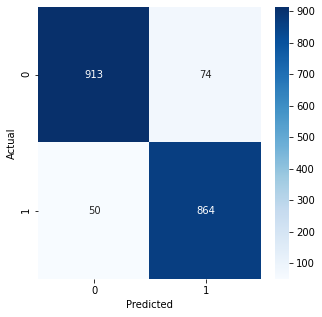

In [ ]:
import seaborn as sns
plt.figure(figsize = (5,5))
sns.heatmap(cm_cv,cmap= "Blues",annot = True, fmt='')


##Results 

In [ ]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model","Category", "Accuracy"]
x.add_row(["Multinomial NB","Machine Learning",90.27])
x.add_row(["MLP", "Deep Learning",93.48])

print(x)


+----------------+------------------+----------+
|     Model      |     Category     | Accuracy |
+----------------+------------------+----------+
| Multinomial NB | Machine Learning |  90.27   |
|      MLP       |  Deep Learning   |  93.48   |
+----------------+------------------+----------+
